In [42]:
import numpy as np
import pandas as pd

In [43]:
ST = pd.read_csv('data/stranger_things_all_dialogue.csv')
print('shape is', ST.shape)
ST.head()

shape is (32519, 8)


,season,episode,line,raw_text,stage_direction,dialogue,start_time,end_time
0,1,1,1,[crickets chirping],[crickets chirping],NaN,00:00:07,00:00:09
1,1,1,2,[alarm blaring],[alarm blaring],NaN,00:00:49,00:00:51
2,1,1,3,[panting],[panting],NaN,00:00:52,00:00:54
3,1,1,4,[elevator descending],[elevator descending],NaN,00:01:01,00:01:02
4,1,1,5,[elevator dings],[elevator dings],NaN,00:01:09,00:01:10


In [44]:
# what kind of data types are we dealing with?

ST.dtypes

season              int64
episode             int64
line                int64
raw_text           object
stage_direction    object
dialogue           object
start_time         object
end_time           object
dtype: object

In [45]:
# not interested in the start time and end time, for this

ST = ST.drop(['start_time', 'end_time'], axis=1)
ST

,season,episode,line,raw_text,stage_direction,dialogue
0,1,1,1,[crickets chirping],[crickets chirping],NaN
1,1,1,2,[alarm blaring],[alarm blaring],NaN
2,1,1,3,[panting],[panting],NaN
3,1,1,4,[elevator descending],[elevator descending],NaN
4,1,1,5,[elevator dings],[elevator dings],NaN
...,...,...,...,...,...,...
32514,4,9,2218,♪ Spellbound ♪,NaN,♪ Spellbound ♪
32515,4,9,2219,♪ Spellbound ♪,NaN,♪ Spellbound ♪
32516,4,9,2220,[vocalizing],[vocalizing],NaN
32517,4,9,2221,♪ Spellbound ♪,NaN,♪ Spellbound ♪


In [46]:
# Anything I want to rename?

ST = ST.rename(columns={"season":"Season", "episode":"Episode", "raw_text": "Raw Text", 
                        "stage_direction":"Stage Direction", "dialogue":"Dialogue"})
ST

,Season,Episode,line,Raw Text,Stage Direction,Dialogue
0,1,1,1,[crickets chirping],[crickets chirping],NaN
1,1,1,2,[alarm blaring],[alarm blaring],NaN
2,1,1,3,[panting],[panting],NaN
3,1,1,4,[elevator descending],[elevator descending],NaN
4,1,1,5,[elevator dings],[elevator dings],NaN
...,...,...,...,...,...,...
32514,4,9,2218,♪ Spellbound ♪,NaN,♪ Spellbound ♪
32515,4,9,2219,♪ Spellbound ♪,NaN,♪ Spellbound ♪
32516,4,9,2220,[vocalizing],[vocalizing],NaN
32517,4,9,2221,♪ Spellbound ♪,NaN,♪ Spellbound ♪


In [47]:
# no duplicates

ST.duplicated().sum()

0

In [48]:
# investigating null values

ST.isnull().sum()

Season                 0
Episode                0
line                   0
Raw Text               0
Stage Direction    21841
Dialogue            6084
dtype: int64

In [50]:
# looking at what kind of seasonal data we have

ST[ST.Season == 2]

,Season,Episode,line,Raw Text,Stage Direction,Dialogue
5750,2,1,1,[alarm ringing],[alarm ringing],NaN
5751,2,1,2,[Axel] Go! Go! Go! Go! Go!,[Axel],Go! Go! Go! Go! Go!
5752,2,1,3,-Move it. -[Dottie] Let's get out of here!,[Dottie],Move it. Let's get out of here!
5753,2,1,4,[police siren wailing],[police siren wailing],NaN
5754,2,1,5,"Headed down Poplar, toward Main.",NaN,"Headed down Poplar, toward Main."
...,...,...,...,...,...,...
11658,2,9,765,♪ I look around But it's you I can't replace ♪,NaN,♪ I look around But it's you I can't replace ♪
11659,2,9,766,♪ I feel so cold And I long for your embrace ♪,NaN,♪ I feel so cold And I long for your embrace ♪
11660,2,9,767,"♪ I keep crying baby, baby, please ♪",NaN,"♪ I keep crying baby, baby, please ♪"
11661,2,9,768,[song fading],[song fading],NaN


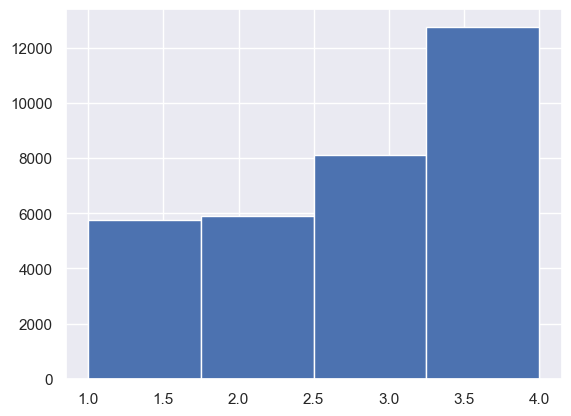

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
import seaborn as sns 


plt.hist(ST['season'], 4);

<Axes: xlabel='Season'>

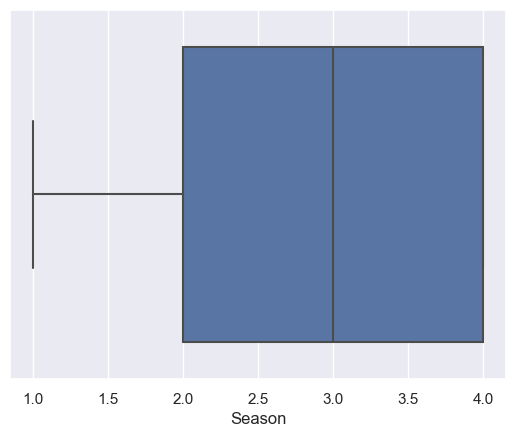

In [53]:
sns.boxplot(x=ST['Season'])

In [60]:
# any outliers in this data?

In [61]:
# plotting different features against each other?